In [39]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [40]:
df = pd.read_excel("../data/Data Responden Artikel Ilmiah Callista dan Alexandra.xlsx")
df.head()

,Nama,Jenis Kelamin,Usia,Jenjang Pendidikan,1. Saya menonton TikTok setiap hari.,2. Saya tidak bisa mengontrol waktu yang saya habiskan di TikTok.,3. Saya sering menonton TikTok dalam waktu lama tanpa sadar.,4. Saya membuka Tiktok lebih dari sekali dalam sehari,5. Saya lebih memilih TikTok karena konten yang bervariasi,6. Saya suka dengan konten di Tiktok karena durasi pendek dan visual menarik,...,16. Saya perlu waktu lama untuk kembali fokus belajar setelah terdistraksi oleh Tiktok.,17. Saya sulit mempertahankan perhatian saat membaca materi.,18. Saya suka mencari ringkasan materi karena malas membaca text yang panjang.,19. Saya mudah memahami materi pembelajaran.,20. Saya mudah mengingat materi yang telah saya pelajarin.,21. Saya selalu menyelesaikan tugas akademik sebelum melakukan aktivitas lain.,22. Saya merasa hasil akademik saya memuaskan.,23. Saya memahami apa yang saya pelajari dari tugas yang diberikan.,24. Saya mampu mengelola waktu belajar dengan baik.,25. Saya rutin mempersiapkan diri untuk ujian/kuis.
0,AL,Laki-laki,21,Mahasiswa,3,1,3,3,3,4,...,1,2,4,4,3,3,4,3,3,3
1,A,Perempuan,19,Mahasiswa,3,3,3,4,4,3,...,3,4,3,2,3,2,2,3,2,4
2,AA,Laki-laki,18,SMA/SMK,4,2,2,3,4,4,...,1,2,2,4,3,3,4,3,3,4
3,AA,Laki-laki,20,Mahasiswa,4,3,4,3,3,4,...,2,2,1,4,3,3,4,3,3,4
4,FA,Perempuan,21,Mahasiswa,4,2,2,2,4,4,...,2,1,2,4,3,3,4,4,3,4


In [41]:
#drop names (so stays anonymous)
df = df.drop(columns=["Nama "], errors="ignore")

In [42]:
#remove incomplete responses
df = df.dropna()
df.shape

(150, 28)

In [43]:
df = pd.read_csv("../data/day1.csv")
df.columns = df.columns.str.strip()
df.head()

,Jenis Kelamin,Usia,Jenjang Pendidikan,1. Saya menonton TikTok setiap hari.,2. Saya tidak bisa mengontrol waktu yang saya habiskan di TikTok.,3. Saya sering menonton TikTok dalam waktu lama tanpa sadar.,4. Saya membuka Tiktok lebih dari sekali dalam sehari,5. Saya lebih memilih TikTok karena konten yang bervariasi,6. Saya suka dengan konten di Tiktok karena durasi pendek dan visual menarik,7. Saya merasa sulit memahami materi yang memiliki banyak informasi kompleks.,...,16. Saya perlu waktu lama untuk kembali fokus belajar setelah terdistraksi oleh Tiktok.,17. Saya sulit mempertahankan perhatian saat membaca materi.,18. Saya suka mencari ringkasan materi karena malas membaca text yang panjang.,19. Saya mudah memahami materi pembelajaran.,20. Saya mudah mengingat materi yang telah saya pelajarin.,21. Saya selalu menyelesaikan tugas akademik sebelum melakukan aktivitas lain.,22. Saya merasa hasil akademik saya memuaskan.,23. Saya memahami apa yang saya pelajari dari tugas yang diberikan.,24. Saya mampu mengelola waktu belajar dengan baik.,25. Saya rutin mempersiapkan diri untuk ujian/kuis.
0,Laki-laki,21,Mahasiswa,3,1,3,3,3,4,3,...,1,2,4,4,3,3,4,3,3,3
1,Perempuan,19,Mahasiswa,3,3,3,4,4,3,4,...,3,4,3,2,3,2,2,3,2,4
2,Laki-laki,18,SMA/SMK,4,2,2,3,4,4,1,...,1,2,2,4,3,3,4,3,3,4
3,Laki-laki,20,Mahasiswa,4,3,4,3,3,4,2,...,2,2,1,4,3,3,4,3,3,4
4,Perempuan,21,Mahasiswa,4,2,2,2,4,4,2,...,2,1,2,4,3,3,4,4,3,4


In [44]:
#exposure: Q1–Q6
exposure_cols = [col for col in df.columns if col.startswith(tuple(f"{i}." for i in range(1, 7)))]

#attention: Q7–Q18
attention_cols = [col for col in df.columns if col.startswith(tuple(f"{i}." for i in range(7, 19)))]

#academic: Q19–Q25
academic_cols = [col for col in df.columns if col.startswith(tuple(f"{i}." for i in range(19, 26)))]

len(exposure_cols), len(attention_cols), len(academic_cols)

(6, 12, 7)

In [45]:
df["Exposure_Index"] = df[exposure_cols].mean(axis=1)
df["Attention_Index"] = df[attention_cols].mean(axis=1)
df["Academic_Index"] = df[academic_cols].mean(axis=1)

df[["Exposure_Index", "Attention_Index", "Academic_Index"]].describe()

,Exposure_Index,Attention_Index,Academic_Index
count,150.000000,150.000000,150.000000
mean,3.190000,2.782778,3.148571
std,0.679965,0.736353,0.652848
min,1.333333,1.416667,1.428571
25%,2.833333,2.104167,2.714286
50%,3.333333,2.916667,3.428571
75%,3.666667,3.500000,3.571429
max,4.000000,3.750000,3.857143


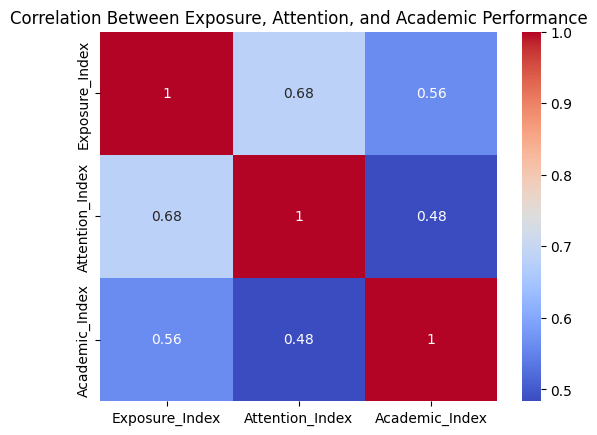

In [46]:
#correlation heat map
corr = df[["Exposure_Index", "Attention_Index", "Academic_Index"]].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Between Exposure, Attention, and Academic Performance")
plt.show()

In [47]:
df["Academic_Level"] = pd.qcut(
    df["Academic_Index"],
    q=3,
    labels=["Low", "Medium", "High"]
)

df["Academic_Level"].value_counts()

Academic_Level
Medium    75
Low       50
High      25
Name: count, dtype: int64

In [50]:
education_map = {
    "SMA/SMK": 1,
    "Mahasiswa": 2,
    "S1": 3,
    "S2": 4
}

df["Education_Num"] = df["Jenjang Pendidikan"].map(education_map)

df[["Jenjang Pendidikan", "Education_Num"]].head()

,Jenjang Pendidikan,Education_Num
0,Mahasiswa,2
1,Mahasiswa,2
2,SMA/SMK,1
3,Mahasiswa,2
4,Mahasiswa,2


In [51]:
#features & target
features = [
    "Exposure_Index",
    "Attention_Index",
    "Usia",
    "Education_Num"
]

target = "Academic_Level"

X = df[features]
y = df[target]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

In [53]:
#random forest regression model
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42
)

rf.fit(X_train, y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [54]:
#feature importance
importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

importance_df

,Feature,Importance
1,Attention_Index,0.490882
0,Exposure_Index,0.291076
2,Usia,0.189729
3,Education_Num,0.028314


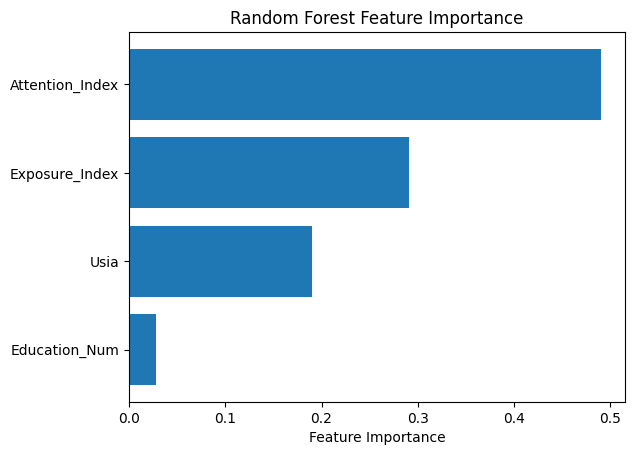

In [55]:
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.show()